In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=np.loadtxt('data\Magic.txt')
tmp_columns=list('abcdefghij')
tmp_columns.append('class')
magic=pd.DataFrame(data=data,columns=tmp_columns)

In [3]:
magic

,a,b,c,d,e,f,g,h,i,j,class
0,0.074306,0.062415,0.208043,0.430390,0.293229,0.470032,0.620576,0.512493,0.445467,0.163066,1.0
1,0.082815,0.045727,0.170668,0.587794,0.558601,0.468649,0.623756,0.507944,0.070677,0.412679,1.0
2,0.478241,0.530579,0.626819,0.027617,0.027263,0.556215,0.468201,0.416540,0.855111,0.516926,1.0
3,0.059212,0.037338,0.117445,0.683714,0.580679,0.469558,0.570630,0.515219,0.116100,0.233582,1.0
4,0.214774,0.120603,0.360674,0.345153,0.271003,0.437870,0.632050,0.590373,0.051644,0.718582,1.0
...,...,...,...,...,...,...,...,...,...,...,...
19015,0.051838,0.042581,0.199527,0.650756,0.582457,0.457992,0.602182,0.541215,0.026921,0.213530,2.0
19016,0.074757,0.026141,0.096363,0.593249,0.412061,0.479112,0.605095,0.526076,0.964417,0.498046,2.0
19017,0.215712,0.185389,0.445594,0.146153,0.080901,0.434164,0.653983,0.509218,0.336652,0.516377,2.0
19018,0.352326,0.299950,0.606919,0.092397,0.100756,0.448838,0.417922,0.368263,0.940971,0.823491,2.0


In [4]:
magic.isnull().sum()

a        0
b        0
c        0
d        0
e        0
f        0
g        0
h        0
i        0
j        0
class    0
dtype: int64

---

# 查看特征之间的相关性

<AxesSubplot:>

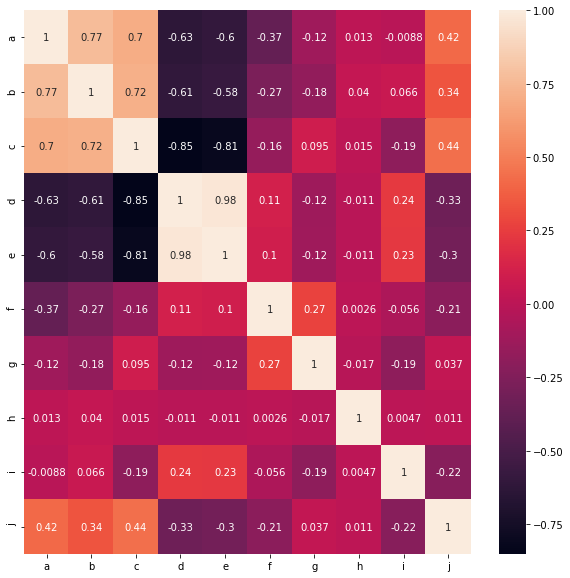

In [7]:
%matplotlib inline
'''
可以看出a-b,a-c,b-c,d-e,j-a,j-b,j-c
'''
complete_features=magic.loc[:,magic.columns.difference(['class'])]
# 绘制热力图
plt.figure(figsize=(10,10))
sns.heatmap(complete_features.corr(),annot=True)


* 聚类插补
* 回归插补
* autocode
* 多重缺省值插补

In [5]:
set(magic['class'].values)

{1.0, 2.0}

# 可视化

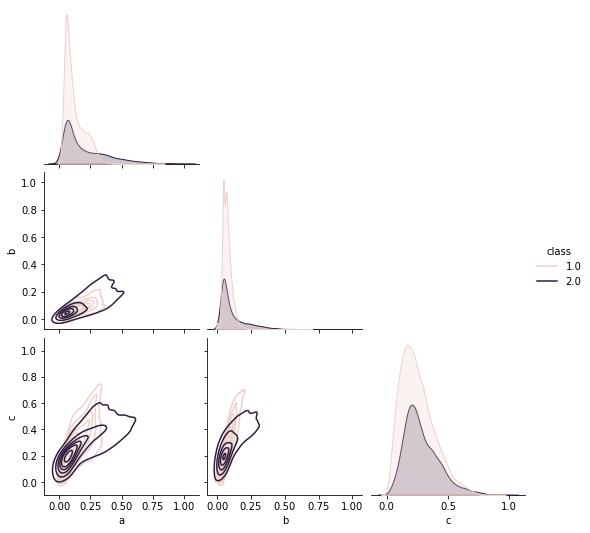

In [6]:
sns.pairplot(
    data=magic,
    vars=['a','b','c'],
    hue="class",
    kind="kde",
    corner=True,
)

# PCA降维可视化

In [89]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 

def plot_pca(num,data,label):
    pca=PCA(n_components=num)
    X_pca=pca.fit_transform(data)
    print(pca.components_)
    # 分割数据
    X_failure=np.array([x for i,x in enumerate(X_pca) if label[i]==1.0])
    X_healthy=np.array([x for i,x in enumerate(X_pca) if label[i]==2.0])
    
    if num==3:
        fig = plt.figure(figsize=[10,15])
        ax = Axes3D(fig)   
        #ax.legend(loc='best')
        ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
        ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
        ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
        ax.scatter(X_failure[:,0], X_failure[:,1], X_failure[:,2])
        ax.scatter(X_healthy[:,0], X_healthy[:,1], X_healthy[:,2])
        # 调整观察角度
        ax.view_init(elev=50,azim=10)
    elif num==2:
        plt.figure(figsize=[10,10])
        plt.scatter(X_failure[:,0],X_failure[:,1])
        plt.scatter(X_healthy[:,0],X_healthy[:,1])
    else:
        print('i do not want to work.....')


[[-0.21673481 -0.10615939 -0.32810886  0.52962287  0.40899489  0.0182684
  -0.04554185 -0.00141248  0.58087571 -0.21563207]
 [ 0.25526966  0.15202269  0.24481104 -0.35668905 -0.27544921 -0.0413599
  -0.04477761  0.00313509  0.80080254  0.0607    ]
 [ 0.24074601  0.08481317  0.05089825  0.2773628   0.25268573 -0.11289994
  -0.10211785  0.00414921  0.02408268  0.87618811]]


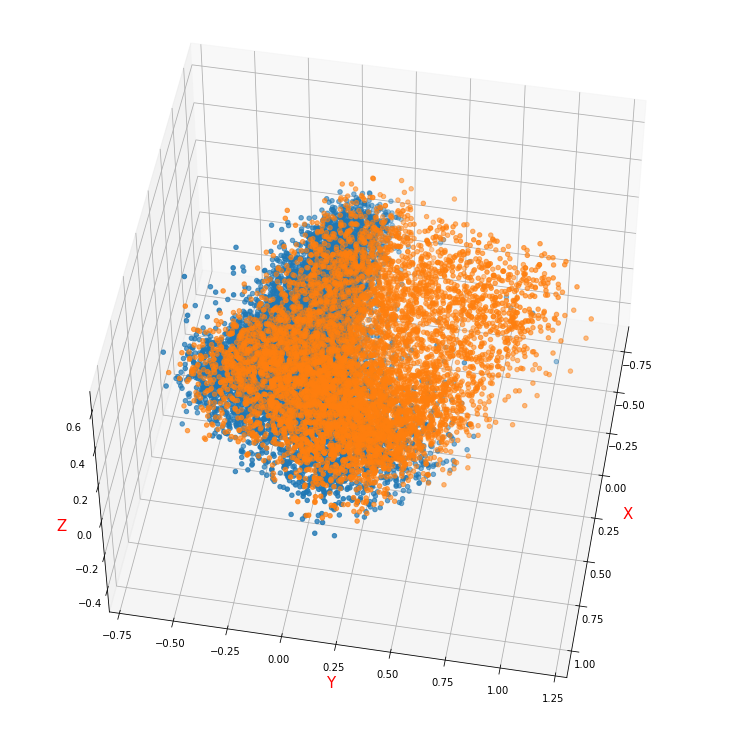

In [90]:
X=magic[magic.columns.difference(['class'])].values
y=magic['class'].values
%matplotlib inline
plot_pca(num=3,data=X,label=y)

# 聚类插补
假设只有

##  手肘法

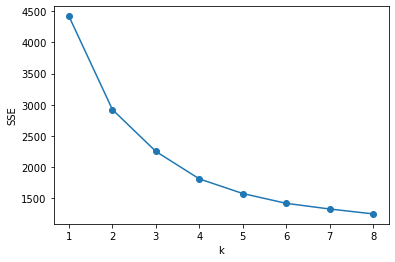

In [91]:
from sklearn.cluster import KMeans
%matplotlib inline
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    estimator=KMeans(n_clusters=k, random_state=9)
    estimator.fit(X)
    SSE.append(estimator.inertia_) # estimator.inertia_获取聚类准则的总和
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(1,9),SSE,'o-')
plt.show()

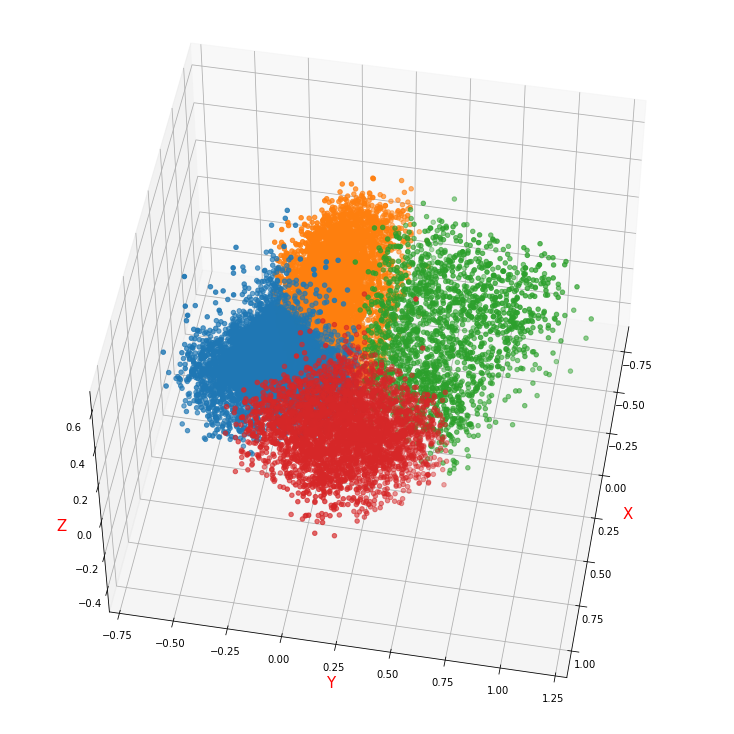

In [100]:
%matplotlib inline
# 先聚类
idxs = KMeans(n_clusters=4, random_state=9).fit_predict(X)
# 降维
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X)

subX = []
#遍历cluster，将样本点（像素）按颜色分类装入subX中
for id in range(len(np.unique(idxs))):
    subX.append(np.array([X_pca[i] for i in range(X_pca.shape[0]) if idxs[i] == id]))
    
fig = plt.figure(figsize=[10,15])
ax = Axes3D(fig)    
#ax.legend(loc='best')
ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
ax.view_init(elev=50,azim=10)
    
for x in range(len(subX)):
    newX = subX[x]
    # 绘制散点图
    ax.scatter(newX[:,0], newX[:,1], newX[:,2])
